This is trial one - use default stop word list, then remove 10% of the less weighted words

## 1. Import Data
read in file from github

In [1]:
#1) get .csv directly from github URL
import requests
import io
url = "https://raw.githubusercontent.com/ivanutsmdsi/iLab1/william/Output/pubmed_data100.csv"
s=requests.get(url).content


In [2]:
## import pubmed_data.csv---
import pandas as pd
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

## subset the data with abstract column only
text = df['Abstract']

print(text)

0     Based on the tradition, history and lore of th...
1     Background:                       Personal pro...
2     Introduction:                       Work-relat...
3     Healthy employee sleep is important for occupa...
4     The measurement of functional outcomes followi...
                            ...                        
95    Home injuries are a substantial health burden ...
96    Background:                       Legislators ...
97    Fracture Liaison Services (FLS) have been show...
98    Purpose:                       Successful appl...
99    This cross-sectional study was conducted in ru...
Name: Abstract, Length: 100, dtype: object


## 2. Create stopword list
Compare the diff between orignal text, with default stopwords, with addin stopwords

In [3]:
#2) Prep file
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4') # use in stemming

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TinaM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TinaM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TinaM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TinaM\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\TinaM\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### 2.1) view the default stopword list:

In [4]:
# 2.1) view the default stopword list:
stops = set(stopwords.words('english'))
stops.update(['br', 'href','Introduction:','Methods: ','Results:','Conclusions:','Purpose:'])
print(f'There are {len(stops)} words in the default stop words list.')
print(stops)


There are 186 words in the default stop words list.
{'mustn', 'didn', 'has', 'out', 'further', 'not', 'don', 'me', 'each', 'what', 'ours', "you'll", 'yours', 'the', 'over', "haven't", 'him', 'them', 'after', 'y', 'itself', 'which', 'he', 'whom', 'shouldn', 'for', 'theirs', 'off', "shan't", "wouldn't", 't', 'before', 'wouldn', 'very', 'between', 'but', 'aren', 'Conclusions:', "mightn't", 'below', 'this', 'o', 'Introduction:', 'wasn', 'did', 'own', 'a', 'during', "mustn't", 'against', 'are', 'with', 'am', 's', 'their', 'it', 'as', 'our', 'into', 'my', 'will', "that'll", 'same', 'then', 'all', 'now', 'under', "didn't", 'nor', 'you', 'ma', "it's", 'in', 'such', "needn't", 'herself', 'where', "won't", 'an', 'through', 'hasn', 'its', 'won', 're', "aren't", 'both', 'than', 'doesn', 'his', 'that', 've', 'Purpose:', 'no', 'why', 'himself', 'these', "you're", 'being', 'so', 'your', 'yourself', 'those', 'is', 'Methods: ', 'does', "hasn't", 'on', 'once', 'few', "isn't", 'we', 'other', 'weren', 'do

### 2.2) Create TF - Terms frequency

In [5]:
# 2.2) Create another customer stopword list from the word frequency
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
text = df['Abstract']
# remove numberic numbers
text_ = text[~text.str.contains(r'[0-9]')]

In [7]:
## 2.2.1) Check word counts by n-gram with default stop words

#### Uni-gram (one word)

In [8]:
## initiate CountVectorizer
uni_count = CountVectorizer(stop_words=list(stops) +['conclusions', 'introduction', 'methods', 'purpose', 'results']
                           ,ngram_range=(1,1) 
                        #    ,preprocessor=text_preprocessor
                           )
uni_word_count=uni_count.fit_transform(text_)

In [9]:
## Create table of word count
uni_word_count_df= pd.DataFrame.from_dict(uni_count.vocabulary_, orient = 'index').reset_index()
uni_word_count_df.rename(columns={"index": "uni_words",0:"word_ct" }, inplace=True)
print('uni_Word Count List')
uni_word_count_df_ = uni_word_count_df.sort_values(by=["word_ct"],ascending=False).reset_index()
uni_word_count_df_

uni_Word Count List


,index,uni_words,word_ct
0,43,years,865
1,759,wrong,864
2,768,would,863
3,724,world,862
4,668,workplaces,861
...,...,...,...
861,18,accident,4
862,854,access,3
863,286,absorption,2
864,65,able,1


In [10]:
## save the word count as .csv
import csv 
with open('uni_gram_word_count_list.csv', 'w', newline='') as f:
   writer = csv.writer(f)
   writer.writerow(uni_word_count_df_)

print('Save the uni_gram word count list as .csv')


Save the uni_gram word count list as .csv


#### Bi-gram (two words)

In [11]:
## initiate CountVectorizer
bi_count = CountVectorizer(stop_words=list(stops) +['conclusions', 'introduction', 'methods', 'purpose', 'results']
                           ,ngram_range=(2,2) 
                        #    ,preprocessor=text_preprocessor
                           )
bi_word_count=bi_count.fit_transform(text_)

In [12]:
## Create table of bi_word count
bi_word_count_df= pd.DataFrame.from_dict(bi_count.vocabulary_, orient = 'index').reset_index()
bi_word_count_df.rename(columns={"index": "bi_words",0:"word_ct" }, inplace=True)
print('Bi_Word Count List')
bi_word_count_df_ = bi_word_count_df.sort_values(by=["word_ct"],ascending=False).reset_index()
bi_word_count_df_

Bi_Word Count List


,index,bi_words,word_ct
0,60,years swea,1366
1,1126,years life,1365
2,325,years frostbite,1364
3,1190,wrong suite,1363
4,1205,would ir,1362
...,...,...,...
1362,474,absorption might,4
1363,398,absorption comfort,3
1364,89,able reduce,2
1365,201,able establish,1


In [13]:
## save the word count as .csv

with open('bi_gram_word_count_list.csv', 'w', newline='') as f:
   writer = csv.writer(f)
   writer.writerow(bi_word_count_df_)

print('Save the bi_gram word count list as .csv')


Save the bi_gram word count list as .csv


#### Tri-gram (three words)

In [17]:
## fit the copus
tri_count = CountVectorizer(stop_words=list(stops) +['conclusions', 'introduction', 'methods', 'purpose', 'results']
                           ,ngram_range=(3,3) 
                        #    ,preprocessor=text_preprocessor
                           )
tri_word_count=tri_count.fit_transform(text_)

In [20]:
## Create table of tri_word count
tri_word_count_df= pd.DataFrame.from_dict(tri_count.vocabulary_, orient = 'index').reset_index()
tri_word_count_df.rename(columns={"index": "tri_words",0:"word_ct" }, inplace=True)
print('Tri_Word Count List')
tri_word_count_df_ = tri_word_count_df.sort_values(by=["word_ct"],ascending=False).reset_index()
tri_word_count_df_

Tri_Word Count List


,index,tri_words,word_ct
0,62,years swea planning,1419
1,1173,years life western,1418
2,337,years frostbite injury,1417
3,1239,wrong suite may,1416
4,1255,would ir capabilities,1415
...,...,...,...
1415,491,absorption might inflicted,4
1416,411,absorption comfort visibility,3
1417,91,able reduce risks,2
1418,206,able establish ray,1


In [21]:
## save the word count as .csv

with open('tri_gram_word_count_list.csv', 'w', newline='') as f:
   writer = csv.writer(f)
   writer.writerow(tri_word_count_df_)

print('Save the tri_gram word count list as .csv')


Save the tri_gram word count list as .csv


In [ ]:
## Optional: read in .csv use as stop list
# f = open("final_stop_words.csv")
# search_key_words=f.read()
# f.close()
# search_key_words_ls = list(search_key_words)
# print (f'Total of {len(search_key_words)} keywords searched, add this to the stopword list')
## this part is not in used.

## 2.2.2) using the count vectorizer to generate a list of word vs weights (idf), by uni-gram

In [61]:
## 2.2.2.B) using the count vectorizer to generate a list of word vs weights
uni_count = CountVectorizer(stop_words=list(stops) +['conclusions', 'introduction', 'methods', 'purpose', 'results']
                           ,ngram_range=(1,1) 
                        #    ,preprocessor=text_preprocessor
                           )
uni_word_count=uni_count.fit_transform(text_)
## stop words can add in here, count = CountVectorizer(df['Abstract'], stop_words= stops) 
## ignore words that appear in less than 2 docments, count = CountVectorizer(df['Abstract'],min_df=2)
## ignore terms that appear in 50% of the documents, count = CountVectorizer(df['Abstract'],max_df=0.5)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(uni_word_count)

TfidfTransformer()

### IDF Value - inverse document frequency
The higher the weights, the less it appear in any particular document; the lower the IDF value of a word, the less unique it is to any particular document. 
IDF gives us information about the relative rarity of a term in the collection of documents
The reason we need IDF is to help correct for words like “of”, “as”, “the”, etc. since they appear frequently in an English corpus. Thus by taking inverse document frequency, we can minimize the weighting of frequent terms while making infrequent terms have a higher impact.
source (https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YwsWEnZBwQ8)

In [101]:
### idf value
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=uni_count.get_feature_names_out(),columns=["idf_weights"])

print(f'IDF table.')
df_idf.sort_values(by=['idf_weights'])

IDF table.


,idf_weights
injury,1.324661
injuries,1.589769
study,1.626136
construction,1.723300
data,1.877451
...,...
happened,4.921973
happening,4.921973
hardship,4.921973
gun,4.921973


In [102]:
df_idf = df_idf.reset_index()

In [104]:
df_idf.idf_weights.describe()


count    4031.000000
mean        4.549469
std         0.561679
min         1.324661
25%         4.228826
50%         4.921973
75%         4.921973
max         4.921973
Name: idf_weights, dtype: float64

## 2.2.2) mannually inspect the the list

In [107]:
## 2.2.2) mannually inspect the the list
#df_tfifd.sort_values(by=["tfidf"],ascending=True).to_csv('vectorized_word_list.csv', index=True)

print(f'Total of {len(df_idf)} words within the {len(df)} search results.')
## Total of 4136 words within the 100 search results.

df_idf.rename(columns={"index": "words"}, inplace=True) # 4031

df_idf

Total of 4031 words within the 100 search results.


,words,idf_weights
0,00,4.516508
1,000,3.217225
2,001,4.005683
3,002,4.921973
4,01,4.228826
...,...,...
4026,zone,4.921973
4027,µg,4.921973
4028,ĸb,4.921973
4029,χ2,4.921973


In [110]:
df_idf.idf_weights.describe()

count    4031.000000
mean        4.549469
std         0.561679
min         1.324661
25%         4.228826
50%         4.921973
75%         4.921973
max         4.921973
Name: idf_weights, dtype: float64

In [112]:
# there are words numberic numbers, let's remove them 
df_idf_c = df_idf[~df_idf.words.str.contains(r'[0-9]')]

df_idf_c.idf_weights.describe()

count    3757.000000
mean        4.551842
std         0.562177
min         1.324661
25%         4.228826
50%         4.921973
75%         4.921973
max         4.921973
Name: idf_weights, dtype: float64

In [113]:
df_idf_c

,words,idf_weights
266,aans,4.921973
267,ababa,4.921973
268,abandoned,4.921973
269,abbreviated,4.516508
270,abdominal,4.921973
...,...,...
4025,zmir,4.921973
4026,zone,4.921973
4027,µg,4.921973
4028,ĸb,4.921973


In [116]:
# looks ok, no need to add any more stopwords as they might be relevent, ignore below
#
# df_tfifd_c = df_tfifd_c.sort_values(by=["weight"],ascending=True)
# df_tfifd_c
# 
## 2.2.4) use 10% of all the words with low tfifd as custom stop list to get some generic theme
## option: next can to explor this 10% to see what's new within the generic theme?
#custom_stopwords = df_tfifd_c[:int(len(df_tfifd_c)*0.1)]
# stop_perf = 0.1
# 
# custom_stopwords = df_tfifd_c[:int(len(df_tfifd_c)*stop_perf)].words
# print(f'total of {len(df_tfifd_c)} non numberic words used within the {len(df)} search result, put 10% or {len(custom_stopwords)} of them in stop word list')
# 
# print(f'Custom stopword list')
## lots of numberic number and already stop words
# print(list(custom_stopwords))

custom_stopwords = ''

## 2.2.3) remove numeric words

In [117]:
## 2.2.3) remove numeric words
## source (https://stackoverflow.com/questions/50804036/delete-rows-containing-numeric-values-in-strings-from-pandas-dataframe)
df_idf_c = df_idf[~df_idf.words.str.contains(r'[0-9]')]

print(f'Total of {len(df_idf_c)} non numberic words within all {len(df_idf)} non default stop words.')
## 3862 rows × 2 columns

Total of 3757 non numberic words within all 4031 non default stop words.


In [118]:
## test if the custom word contains words in stoplist
## need to come back and check if there's a need to remove all stopwords 
df_idf_c.loc[df_idf_c['words'] == 're']

,words,idf_weights


In [119]:
## 2.2.5) combined the custom_stopwords with the default stopword list

# print(f'There are {len(final_stopwords)} (custom: {len(custom_stopwords)} and default: {len(stops)}) final stop words.')

final_stopwords = list(stops) + list(custom_stopwords)

print(f'There are {len(final_stopwords)} (custom: {len(custom_stopwords)} and default: {len(stops)}) final stop words.')

print(final_stopwords)

There are 186 (custom: 0 and default: 186) final stop words.
['mustn', 'didn', 'has', 'out', 'further', 'not', 'don', 'me', 'each', 'what', 'ours', "you'll", 'yours', 'the', 'over', "haven't", 'him', 'them', 'after', 'y', 'itself', 'which', 'he', 'whom', 'shouldn', 'for', 'theirs', 'off', "shan't", "wouldn't", 't', 'before', 'wouldn', 'very', 'between', 'but', 'aren', 'Conclusions:', "mightn't", 'below', 'this', 'o', 'Introduction:', 'wasn', 'did', 'own', 'a', 'during', "mustn't", 'against', 'are', 'with', 'am', 's', 'their', 'it', 'as', 'our', 'into', 'my', 'will', "that'll", 'same', 'then', 'all', 'now', 'under', "didn't", 'nor', 'you', 'ma', "it's", 'in', 'such', "needn't", 'herself', 'where', "won't", 'an', 'through', 'hasn', 'its', 'won', 're', "aren't", 'both', 'than', 'doesn', 'his', 'that', 've', 'Purpose:', 'no', 'why', 'himself', 'these', "you're", 'being', 'so', 'your', 'yourself', 'those', 'is', 'Methods: ', 'does', "hasn't", 'on', 'once', 'few', "isn't", 'we', 'other', 'we

In [120]:
## write the stopwords into a .csv
import csv # Import the csv module to work with csv files
with open('final_stop_words.csv', 'w', newline='') as f:
     writer = csv.writer(f)
     writer.writerow(final_stopwords)

### Wordclouds

In [121]:
## 2.2.6) Word cloud after stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

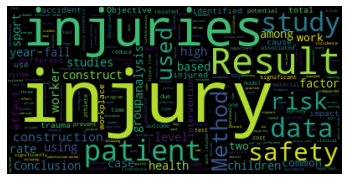

In [122]:
textt = " ".join(review for review in df.Abstract)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_NO_stopwords.png')
plt.show()

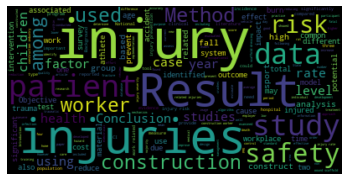

In [124]:
textt = " ".join(review for review in df.Abstract)
wordcloud = WordCloud(stopwords=stops).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_defaultstopwords.png')
plt.show()

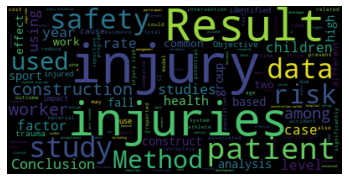

In [123]:
textt = " ".join(review for review in df.Abstract)
wordcloud = WordCloud(stopwords=final_stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_combinedstopwords.png')
plt.show()

In [126]:
## df.Abstract = raw text
print(f'Total of {len(df_tfifd)} words within the {len(df)} search results.')
print(f'total of {len(df_tfifd_c)} non numberic words used within the {len(df)} search result.')
print(f'There are {len(stops)} words in the default stop words list.')
print(f'Use {len(custom_stopwords)} of them with low tfifd in stop word list')
print(f'Total {len(final_stopwords)} words in the final stopwords list.')

Total of 4031 words within the 100 search results.
total of 3862 non numberic words used within the 100 search result.
There are 186 words in the default stop words list.
Use 0 of them with low tfifd in stop word list
Total 186 words in the final stopwords list.


## 3. Stemming and lemmatization
Use steming and lematization to group similar words together

In [127]:
# stemmer and lemmatizer
# stopwords = nltk.corpus.stopwords.words('english')
stopwords = final_stopwords
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
# Constants

text_ = df['Abstract']

# POS (Parts Of Speech) for: NN = nouns, JJ = adjectives, VB= verbs and RB= adverbs, JJR = adjective, comparative (larger), WRB=wh- adverb (how), WP = wh- pronoun (who), WDT = wh-determiner (that, what)
## whole list in 
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r', 'JJR':'c', 'WRB':'b','WP':'p','WDT':'t'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

In [53]:
# set up text_processer func
import re
def text_preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words with "_connector_"
    
    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)